In [12]:
import tensorflow as tf
from tensorflow.keras import datasets,layers,models
import matplotlib.pyplot as plt

In [13]:
(train_images,train_labels),(test_images,test_labels)=datasets.cifar10.load_data()

In [14]:
train_images,test_images=train_images/255.0,test_images/255.0

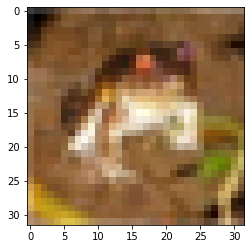

In [15]:
plt.imshow(train_images[0])

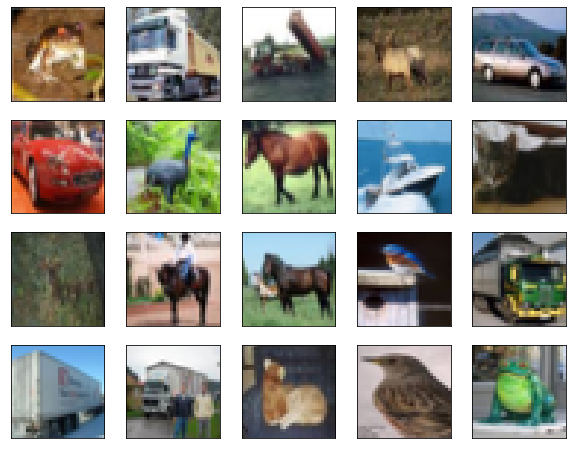

In [16]:
class_names =["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

plt.figure(figsize=(10,10))
for i in range(20):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i],cmap=plt.cm.binary)
plt.show()

In [17]:
model =models.Sequential()
model.add(layers.Conv2D(32,(3,3),activation='relu',input_shape=(32,32,3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3),activation='relu'))

In [18]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 4, 4, 64)          36928     
Total params: 56,320
Trainable params: 56,320
Non-trainable params: 0
_________________________________________________________________


In [19]:
model.add(layers.Flatten())
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(10))

In [20]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 4, 4, 64)          36928     
_________________________________________________________________
flatten_1 (Flatten)          (None, 1024)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)               

In [21]:
model.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])
history=model.fit(train_images,train_labels,epochs=10,validation_data=(test_images,test_labels))

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 118s 2ms/sample - loss: 1.5097 - accuracy: 0.4487 - val_loss: 1.3181 - val_accuracy: 0.5173
Epoch 2/10
50000/50000 [==============================] - 112s 2ms/sample - loss: 1.1616 - accuracy: 0.5872 - val_loss: 1.0839 - val_accuracy: 0.6234
Epoch 3/10
50000/50000 [==============================] - 113s 2ms/sample - loss: 1.0155 - accuracy: 0.6424 - val_loss: 1.0034 - val_accuracy: 0.6500
Epoch 4/10
50000/50000 [==============================] - 111s 2ms/sample - loss: 0.9131 - accuracy: 0.6778 - val_loss: 0.9437 - val_accuracy: 0.6758
Epoch 5/10
50000/50000 [==============================] - 112s 2ms/sample - loss: 0.8417 - accuracy: 0.7031 - val_loss: 0.9158 - val_accuracy: 0.6798
Epoch 6/10
50000/50000 [==============================] - 112s 2ms/sample - loss: 0.7744 - accuracy: 0.7270 - val_loss: 0.8666 - val_accuracy: 0.7038
Epoch 7/10
50000/50000 [==========================

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

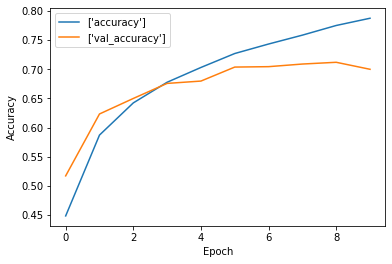

In [23]:
plt.plot(history.history['accuracy'],label=['accuracy'])
plt.plot(history.history['val_accuracy'],label=['val_accuracy'])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

test_loss,test_acc=model.evaluate(test_images,test_labels)